In [17]:
from dolfin import *
import numpy as np

# Create mesh and define function space
mesh = UnitSquareMesh(6, 6)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define boundary conditions
u0 = Expression("1 + x[0]*x[0] + 2*x[1]*x[1]",degree=2)
def u0_boundary(x, on_boundary):
    return on_boundary
bc = DirichletBC(V, u0, u0_boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)


In [18]:
# Guardem la solució
file = File("poisson_sol.pvd")
file << u

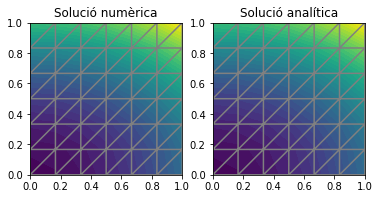

In [2]:
# Fem un plot de la solució
import matplotlib.pyplot as plt
plt.subplot(121)
plot(u)
plot(mesh)
plt.title("Solució numèrica")

# Representem ara la solució analítica és u_a(x,y)=1+x^2+2*y^2 
u_a = Expression("1 + x[0]*x[0] + 2*x[1]*x[1]",degree=2)
u_a_V = interpolate(u_a,V) # agafem els valors de u_a només a l'espai V2

plt.subplot(122)
plot(u_a_V)
plot(mesh)
plt.title("Solució analítica")


plt.show()

In [3]:
# Calculem l'error
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
Emax = np.abs(u_a_V.vector().get_local() - u.vector().get_local()).max()
print(f"Error : {Emitj:.2e}")
print(f"Error local màxim : {Emax:.2e}")
E_1 = Emitj

Error : 4.36e-16
Error local màxim : 1.33e-15


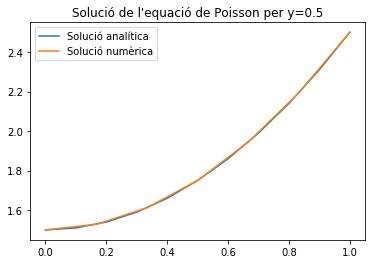

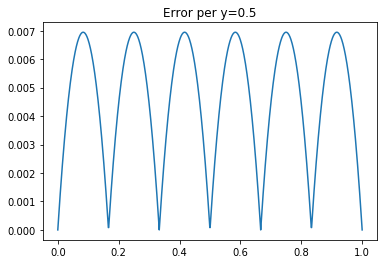

In [4]:
# Ara voldrem representar les funcions en 1 dimensió avaluant-les en y=0.5.
# Comencem amb la funció analítica
mesh_1d = IntervalMesh(10, 0, 1)
V_1d = FunctionSpace(mesh_1d, "Lagrange", 1)
u_a_y_05 = Expression("1.5+x[0]*x[0]",degree=2)
u_a_05_V = interpolate(u_a_y_05,V_1d)
plot(u_a_05_V, label='Solució analítica')


# Ara amb la funció numèrica
eix_x = np.linspace(0, 1, 1000)
u_y_05 = np.zeros(1000)

for i, x in enumerate(eix_x):
    u_y_05[i] = u(x,0.5)

    
plt.plot(eix_x, u_y_05, label= 'Solució numèrica')
plt.legend()
plt.title("Solució de l'equació de Poisson per y=0.5")

plt.show()

# Representem ara la diferència entre les dos funcions

error_05 = np.zeros(1000)
for i, x in enumerate(eix_x):
    error_05[i] = u_y_05[i] - u_a_y_05(x)
plt.plot(eix_x, error_05)
plt.title("Error per y=0.5")

plt.show()

9.65489842689276e-16
1.6833949197929063e-15
5.882401214675944e-15
8.047136787240611e-15


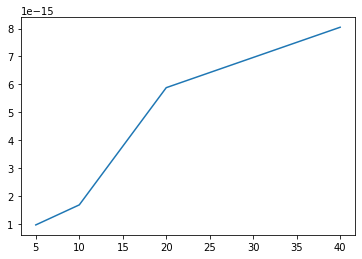

In [14]:
# Ara volem veure l'efecte de la discretització
n1=5
n2=10
n3=20
n4=40

# 1. 5x5 ______________________________________________________________________________________________________________________

# Create mesh and define function space
mesh = UnitSquareMesh(n1,n1)
V = FunctionSpace(mesh, "Lagrange", 1)

# Boundary
bc = DirichletBC(V, u0, u0_boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Error
u_a_V = interpolate(u_a,V)
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
E_1 = Emitj
print(Emitj)

# 2. 10x10 ____________________________________________________________________________________________________________________

# Create mesh and define function space
mesh = UnitSquareMesh(n2,n2)
V = FunctionSpace(mesh, "Lagrange", 1)

# Boundary
bc = DirichletBC(V, u0, u0_boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Error
u_a_V = interpolate(u_a,V)
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
E_2 = Emitj
print(Emitj)

# 3. 20x20 ___________________________________________________________________________________________________________________

# Create mesh and define function space
mesh = UnitSquareMesh(n3,n3)
V = FunctionSpace(mesh, "Lagrange", 1)

# Boundary
bc = DirichletBC(V, u0, u0_boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Error
u_a_V = interpolate(u_a,V)
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
E_3 = Emitj
print(Emitj)

# 4. 40x40 ___________________________________________________________________________________________________________________

# Create mesh and define function space
mesh = UnitSquareMesh(n4,n4)
V = FunctionSpace(mesh, "Lagrange", 1)

# Boundary
bc = DirichletBC(V, u0, u0_boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Error
u_a_V = interpolate(u_a,V)
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
E_4 = Emitj
print(Emitj)

# ____________________________________________________________________________________________________________________________

N=[n1,n2,n3,n4]
e_max=[E_1,E_2,E_3,E_4] 
plt.plot(N,e_max)
plt.show()

# ?? Un altre cop sembla que l'error és més alt a mesura que discretitzem més la xarxa, en aquest cas però, podria ser perquè 
# la funció que posem com a condició de contorn és la pròpia solució i això fa que al fer que hi hagi menys elements a la xarxa
# la solució s'apropi més a les condicions de contorn?

4.724807393396778e-15
1.7836352229829674e-14
5.882401214675944e-15
4.077151194694278e-14


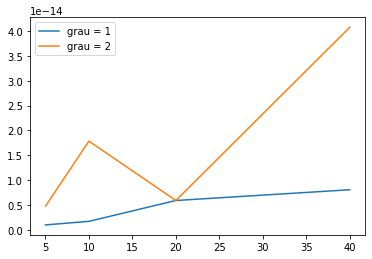

In [15]:
# Ara veurem l'efecte del grau de la funció

# 2. grau 2______________________________________________________________________________-
# 2.1. 5x5 ______________________________________________________________________________________________________________________

# Create mesh and define function space
mesh = UnitSquareMesh(n1,n1)
V = FunctionSpace(mesh, "Lagrange", 2)

# Boundary
bc = DirichletBC(V, u0, u0_boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Error
u_a_V = interpolate(u_a,V)
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
E_1_2 = Emitj
print(Emitj)

# 2.2. 10x10 ____________________________________________________________________________________________________________________

# Create mesh and define function space
mesh = UnitSquareMesh(n2,n2)
V = FunctionSpace(mesh, "Lagrange", 2)

# Boundary
bc = DirichletBC(V, u0, u0_boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Error
u_a_V = interpolate(u_a,V)
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
E_2_2 = Emitj
print(Emitj)

# 2.3. 20x20 ___________________________________________________________________________________________________________________

# Create mesh and define function space
mesh = UnitSquareMesh(n3,n3)
V = FunctionSpace(mesh, "Lagrange", 1)

# Boundary
bc = DirichletBC(V, u0, u0_boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Error
u_a_V = interpolate(u_a,V)
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
E_3_2 = Emitj
print(Emitj)

# 4. 40x40 ___________________________________________________________________________________________________________________

# Create mesh and define function space
mesh = UnitSquareMesh(n4,n4)
V = FunctionSpace(mesh, "Lagrange", 2)

# Boundary
bc = DirichletBC(V, u0, u0_boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Error
u_a_V = interpolate(u_a,V)
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
E_4_2 = Emitj
print(Emitj)


N=[n1,n2,n3,n4]

e_max_2=[E_1_2,E_2_2,E_3_2,E_4_2] 
plt.plot(N,e_max, label = 'grau = 1')
plt.plot(N,e_max_2,label = 'grau = 2')
plt.legend()
plt.show()